In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
installpay = pd.read_csv('installments_payments.csv')
creditcard = pd.read_csv('credit_card_balance.csv')

# Instalments Payments

In [2]:
installpay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [3]:
installpay = installpay.drop_duplicates(subset = ['SK_ID_PREV'], keep = 'last').reset_index(drop = True)

In [4]:
# Below code gives percentage of null in every column
na_percentage = (installpay.isna().sum()/installpay.shape[0])*100

# Below code gives list of columns having more than 60% null
col_to_drop = na_percentage[na_percentage>60].keys()
print(col_to_drop)

installpay = installpay.drop(col_to_drop, axis=1)

Index([], dtype='object')


In [5]:
info = pd.DataFrame(installpay.dtypes, columns=['Dtypes'])
info['Unique'] = installpay.nunique().values
info['NA'] = installpay.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_PREV,int64,997752,0
SK_ID_CURR,int64,339587,0
NUM_INSTALMENT_VERSION,float64,44,0
NUM_INSTALMENT_NUMBER,int64,202,0
DAYS_INSTALMENT,float64,2921,0
DAYS_ENTRY_PAYMENT,float64,3012,1238
AMT_INSTALMENT,float64,413984,0
AMT_PAYMENT,float64,419604,1238


In [6]:
installpay.dropna(how='any', inplace=True)

In [7]:
info = pd.DataFrame(installpay.dtypes, columns=['Dtypes'])
info['Unique'] = installpay.nunique().values
info['NA'] = installpay.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_PREV,int64,996514,0
SK_ID_CURR,int64,339468,0
NUM_INSTALMENT_VERSION,float64,42,0
NUM_INSTALMENT_NUMBER,int64,201,0
DAYS_INSTALMENT,float64,2921,0
DAYS_ENTRY_PAYMENT,float64,3012,0
AMT_INSTALMENT,float64,413767,0
AMT_PAYMENT,float64,419604,0


In [8]:
installpay.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,996514.0,1.903210e+06,535722.938821,1000001.0,1434798.250,1.896136e+06,2.368792e+06,2843499.000
SK_ID_CURR,996514.0,2.782975e+05,102776.569778,100001.0,189340.250,2.784880e+05,3.673640e+05,456255.000
NUM_INSTALMENT_VERSION,996514.0,1.125977e+00,0.839012,0.0,1.000,1.000000e+00,1.000000e+00,73.000
NUM_INSTALMENT_NUMBER,996514.0,7.259946e+00,11.410070,1.0,2.000,5.000000e+00,8.000000e+00,235.000
DAYS_INSTALMENT,996514.0,-1.016765e+03,832.742315,-2922.0,-1614.000,-7.580000e+02,-3.190000e+02,-2.000
DAYS_ENTRY_PAYMENT,996514.0,-1.028276e+03,831.886143,-3160.0,-1626.000,-7.700000e+02,-3.310000e+02,-2.000
AMT_INSTALMENT,996514.0,2.563918e+04,84124.082107,0.0,5698.800,1.038224e+04,1.949853e+04,3371884.155
AMT_PAYMENT,996514.0,2.587421e+04,86266.721635,0.0,5294.475,9.954900e+03,1.911281e+04,3371884.155


In [9]:
installpay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1552493,198539,2.0,1,-698.0,-713.0,2292736.860,2292736.860
1,1648894,129044,2.0,1,-199.0,-213.0,107328.825,107328.825
2,2642954,193860,3.0,1,-377.0,-380.0,261868.275,261868.275
3,1685073,156718,1.0,1,-43.0,-73.0,14976.450,14976.450
4,2426699,181443,3.0,1,-245.0,-264.0,465783.840,465783.840
...,...,...,...,...,...,...,...,...
997709,2006721,442291,1.0,3,-1311.0,-1318.0,2934.225,2934.225
997710,1126000,428449,0.0,12,-301.0,-302.0,6793.470,6750.000
997711,1519070,444122,1.0,5,-399.0,-407.0,4363.830,4363.830
997712,2784672,444977,0.0,4,-157.0,-157.0,373.005,373.005


In [10]:
installpay.drop("SK_ID_CURR", axis = 1, inplace=True)

In [11]:
info = pd.DataFrame(installpay.dtypes, columns=['Dtypes'])
info['Unique'] = installpay.nunique().values
info['NA'] = installpay.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_PREV,int64,996514,0
NUM_INSTALMENT_VERSION,float64,42,0
NUM_INSTALMENT_NUMBER,int64,201,0
DAYS_INSTALMENT,float64,2921,0
DAYS_ENTRY_PAYMENT,float64,3012,0
AMT_INSTALMENT,float64,413767,0
AMT_PAYMENT,float64,419604,0


In [12]:
installpay.isna().sum()

SK_ID_PREV                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

# Credit Card Balance

In [13]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [14]:
creditcard = creditcard.drop_duplicates(subset = ['SK_ID_PREV'], keep = 'last').reset_index(drop = True)

In [15]:
info = pd.DataFrame(creditcard.dtypes, columns=['Dtypes'])
info['Unique'] = creditcard.nunique().values
info['NA'] = creditcard.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_PREV,int64,104307,0
SK_ID_CURR,int64,103558,0
MONTHS_BALANCE,int64,96,0
AMT_BALANCE,float64,43185,0
AMT_CREDIT_LIMIT_ACTUAL,int64,111,0
AMT_DRAWINGS_ATM_CURRENT,float64,595,35308
AMT_DRAWINGS_CURRENT,float64,15236,0
AMT_DRAWINGS_OTHER_CURRENT,float64,208,35308
AMT_DRAWINGS_POS_CURRENT,float64,14277,35308
AMT_INST_MIN_REGULARITY,float64,23084,5154


In [16]:
# Below code gives percentage of null in every column
na_percentage = (creditcard.isna().sum()/creditcard.shape[0])*100

# Below code gives list of columns having more than 60% null
col_to_drop = na_percentage[na_percentage>60].keys()
print(col_to_drop)

creditcard = creditcard.drop(col_to_drop, axis=1)

Index([], dtype='object')


In [17]:
creditcard.dropna(how ='any', inplace=True)

In [18]:
info = pd.DataFrame(creditcard.dtypes, columns=['Dtypes'])
info['Unique'] = creditcard.nunique().values
info['NA'] = creditcard.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_PREV,int64,64712,0
SK_ID_CURR,int64,64471,0
MONTHS_BALANCE,int64,96,0
AMT_BALANCE,float64,40254,0
AMT_CREDIT_LIMIT_ACTUAL,int64,109,0
AMT_DRAWINGS_ATM_CURRENT,float64,560,0
AMT_DRAWINGS_CURRENT,float64,13593,0
AMT_DRAWINGS_OTHER_CURRENT,float64,156,0
AMT_DRAWINGS_POS_CURRENT,float64,12769,0
AMT_INST_MIN_REGULARITY,float64,23081,0


In [19]:
creditcard.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,64712.0,1.905271e+06,536279.419428,1000018.00,1.435131e+06,1.897508e+06,2.371027e+06,2843496.000
SK_ID_CURR,64712.0,2.786661e+05,102513.955252,100011.00,1.905552e+05,2.788135e+05,3.677365e+05,456250.000
MONTHS_BALANCE,64712.0,-2.306564e+01,22.317785,-96.00,-3.400000e+01,-1.300000e+01,-6.000000e+00,-1.000
AMT_BALANCE,64712.0,1.060215e+05,149673.351279,-37907.37,0.000000e+00,4.559949e+04,1.609147e+05,1354829.265
AMT_CREDIT_LIMIT_ACTUAL,64712.0,2.083488e+05,198336.946422,0.00,6.750000e+04,1.575000e+05,2.700000e+05,1350000.000
AMT_DRAWINGS_ATM_CURRENT,64712.0,1.060228e+04,41923.230719,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1350000.000
AMT_DRAWINGS_CURRENT,64712.0,1.915582e+04,56472.668007,0.00,0.000000e+00,0.000000e+00,9.062595e+03,1350000.000
AMT_DRAWINGS_OTHER_CURRENT,64712.0,3.476844e+02,9516.058893,0.00,0.000000e+00,0.000000e+00,0.000000e+00,740826.000
AMT_DRAWINGS_POS_CURRENT,64712.0,8.101852e+03,33289.213362,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1224038.295
AMT_INST_MIN_REGULARITY,64712.0,5.366505e+03,7291.599519,0.00,0.000000e+00,2.287755e+03,8.355960e+03,58465.890


C:\Users\agivc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


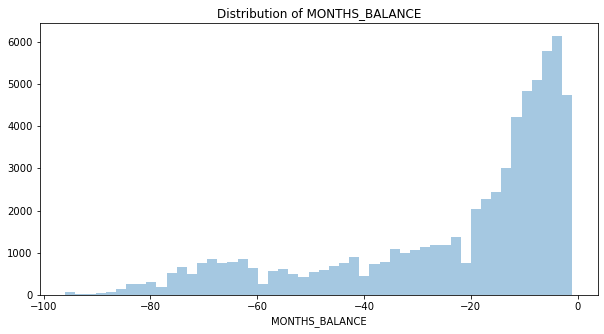

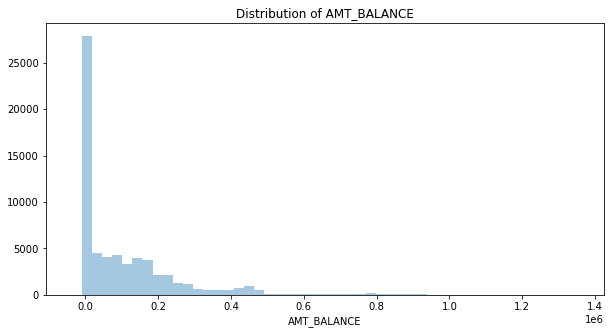

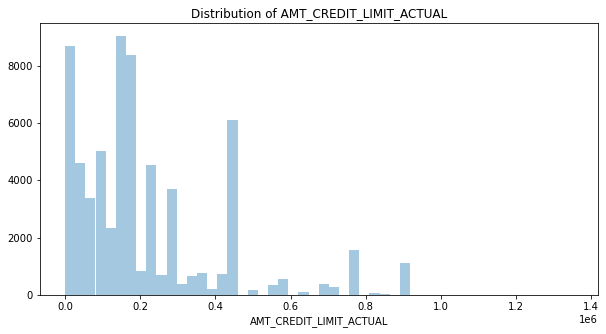

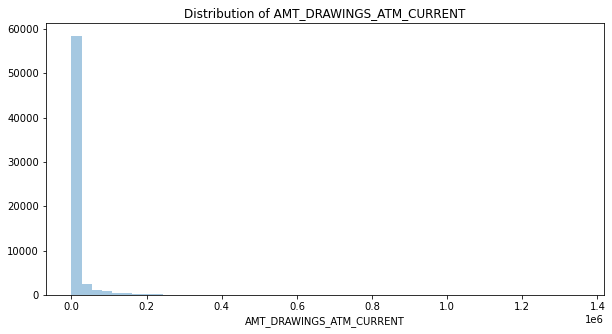

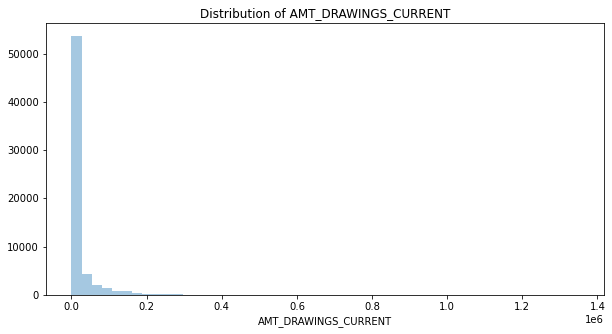

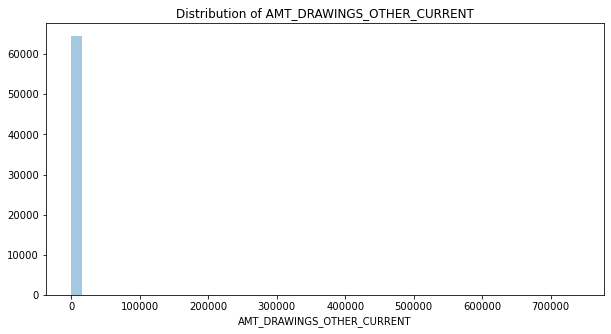

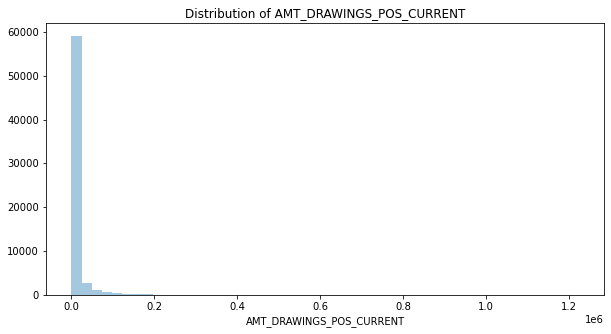

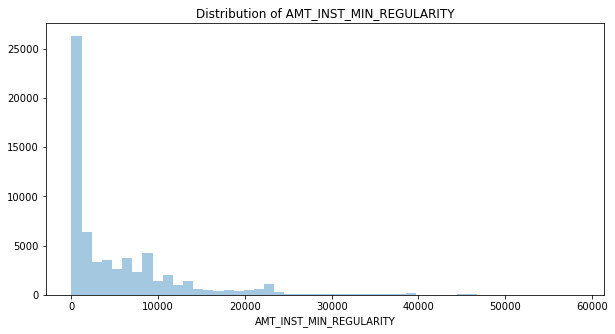

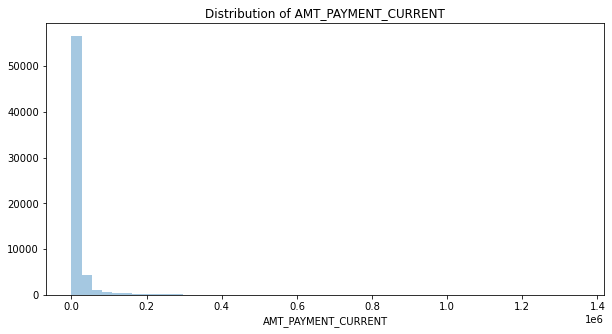

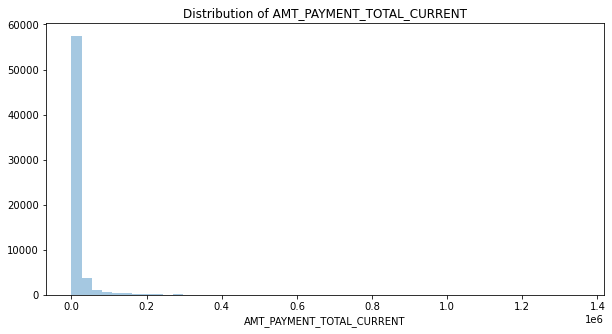

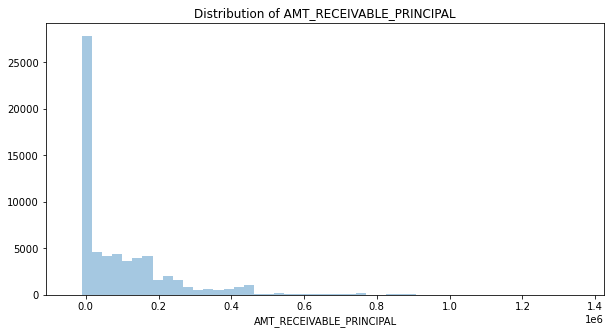

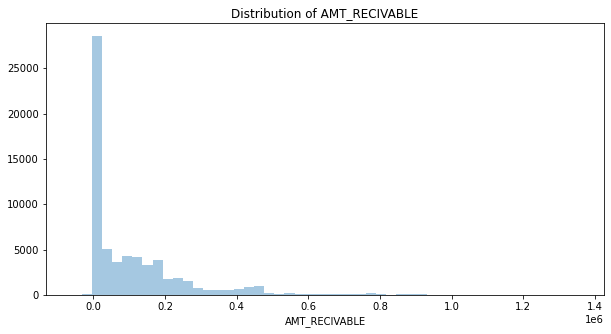

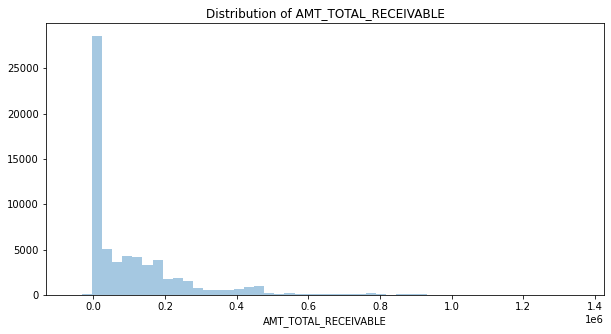

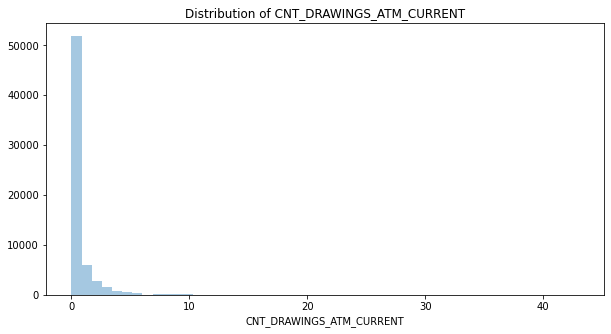

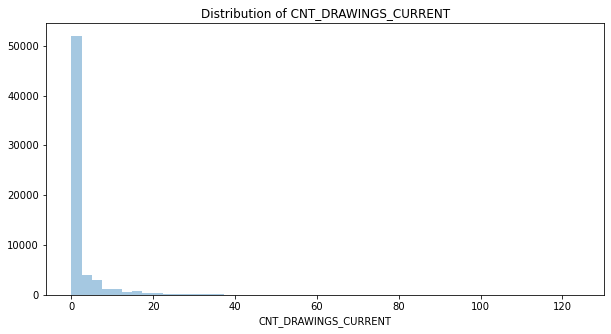

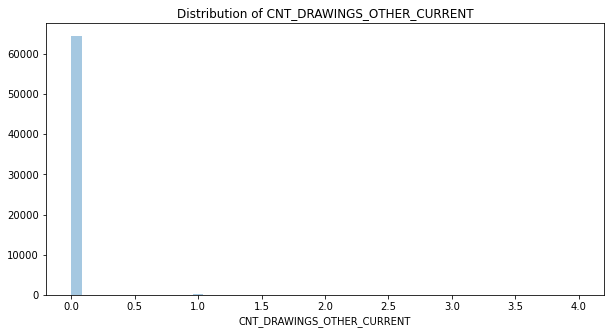

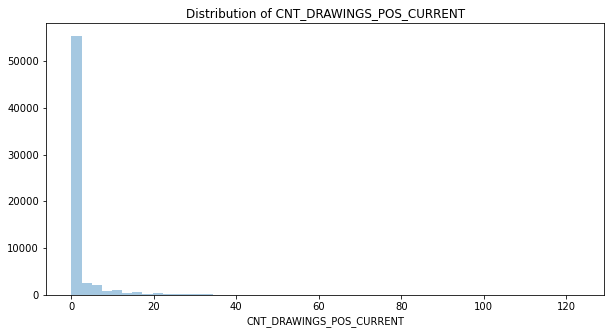

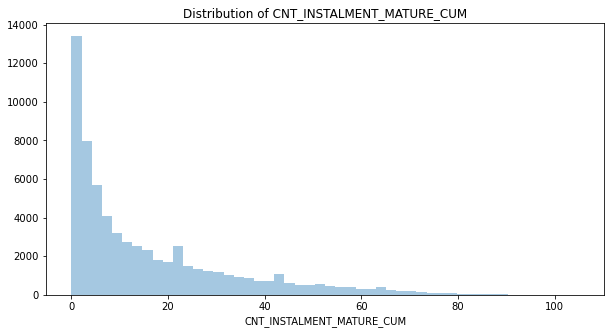

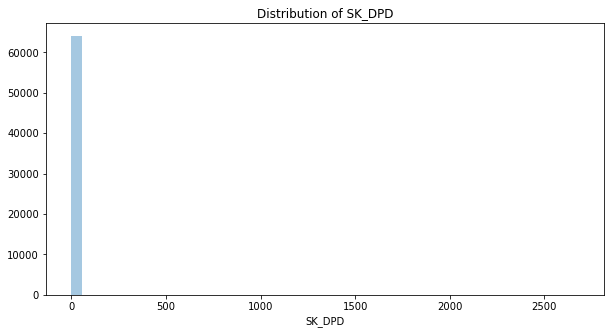

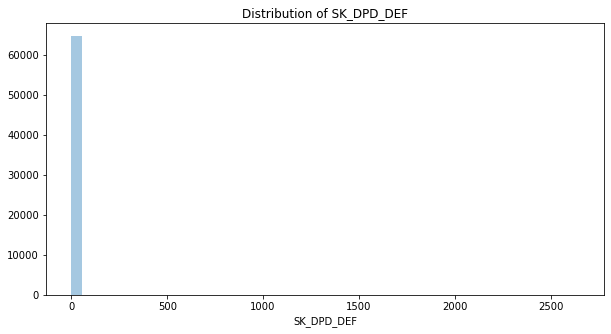

In [20]:
numeric_col = creditcard.select_dtypes(exclude='object').columns.to_list()
for feature in numeric_col[2:]:
    fig, ax = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (10, 5))
    sns.distplot(creditcard[feature].dropna(), kde= False)
    ax.set_title("Distribution of " + feature)

In [21]:
print(creditcard[['AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_CURRENT', 'SK_DPD', 'SK_DPD_DEF']].value_counts(normalize=True)) #parameter normalize=true
#too many 0 -> drop
creditcard.drop(columns = ['AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_CURRENT', 'SK_DPD', 'SK_DPD_DEF'], inplace=True)

AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  CNT_DRAWINGS_POS_CURRENT  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_CURRENT  SK_DPD  SK_DPD_DEF
0.0                         0.000                     0.0                       0.000                 0.0                       0.0                       0.0                         0                     0       0             0.619823
                                                                                                                                                                                                            1       1             0.011312
                                                      4500.0                    4500.000              0.0                       1.0                       0.0                         1                     0       0             0.008190
                                                      9000.0            

In [22]:
creditcard.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,64712.0,1.905271e+06,536279.419428,1000018.00,1.435131e+06,1.897508e+06,2.371027e+06,2843496.000
SK_ID_CURR,64712.0,2.786661e+05,102513.955252,100011.00,1.905552e+05,2.788135e+05,3.677365e+05,456250.000
MONTHS_BALANCE,64712.0,-2.306564e+01,22.317785,-96.00,-3.400000e+01,-1.300000e+01,-6.000000e+00,-1.000
AMT_BALANCE,64712.0,1.060215e+05,149673.351279,-37907.37,0.000000e+00,4.559949e+04,1.609147e+05,1354829.265
AMT_CREDIT_LIMIT_ACTUAL,64712.0,2.083488e+05,198336.946422,0.00,6.750000e+04,1.575000e+05,2.700000e+05,1350000.000
AMT_INST_MIN_REGULARITY,64712.0,5.366505e+03,7291.599519,0.00,0.000000e+00,2.287755e+03,8.355960e+03,58465.890
AMT_PAYMENT_CURRENT,64712.0,1.775449e+04,53363.775822,0.00,2.599538e+02,5.400000e+03,1.350000e+04,1350000.000
AMT_PAYMENT_TOTAL_CURRENT,64712.0,1.645484e+04,52685.686660,0.00,0.000000e+00,4.500000e+03,1.330051e+04,1350000.000
AMT_RECEIVABLE_PRINCIPAL,64712.0,1.020340e+05,144650.567576,-39584.43,0.000000e+00,4.383265e+04,1.549882e+05,1354829.265
AMT_RECIVABLE,64712.0,1.053774e+05,149073.187194,-61424.46,0.000000e+00,4.503294e+04,1.603397e+05,1354829.265


In [25]:
print(creditcard[['AMT_RECIVABLE', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_PAYMENT_CURRENT']].value_counts(normalize=True)) #parameter normalize=true
#AMT_RECIVABLE DAN AMT_RECIVALE_PRINCIPAL SUDAH DIWAKILI AMT_TOTAL_RECIVABLE
#AMT_PAYMENT_CURRENT SUDAH DIWAKILI AMT_PAYMENT_TOTAL_CURRENT
creditcard.drop(columns = ['AMT_RECIVABLE', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_PAYMENT_CURRENT'], inplace=True)

AMT_RECIVABLE  AMT_RECEIVABLE_PRINCIPAL  AMT_PAYMENT_CURRENT
 0.000         0.000                     0.000                  0.052154
                                         225000.000             0.000896
                                         45000.000              0.000603
                                         90000.000              0.000603
                                         4.500                  0.000541
                                                                  ...   
 139319.055    133969.500                6750.000               0.000015
 139307.535    133961.805                9000.000               0.000015
 139306.500    132582.195                6750.000               0.000015
 139301.100    134613.450                9000.000               0.000015
-61424.460     0.000                     61217.685              0.000015
Length: 53964, dtype: float64


In [23]:
creditcard.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
AMT_BALANCE                  0
AMT_CREDIT_LIMIT_ACTUAL      0
AMT_INST_MIN_REGULARITY      0
AMT_PAYMENT_CURRENT          0
AMT_PAYMENT_TOTAL_CURRENT    0
AMT_RECEIVABLE_PRINCIPAL     0
AMT_RECIVABLE                0
AMT_TOTAL_RECEIVABLE         0
CNT_INSTALMENT_MATURE_CUM    0
NAME_CONTRACT_STATUS         0
dtype: int64

['NAME_CONTRACT_STATUS']


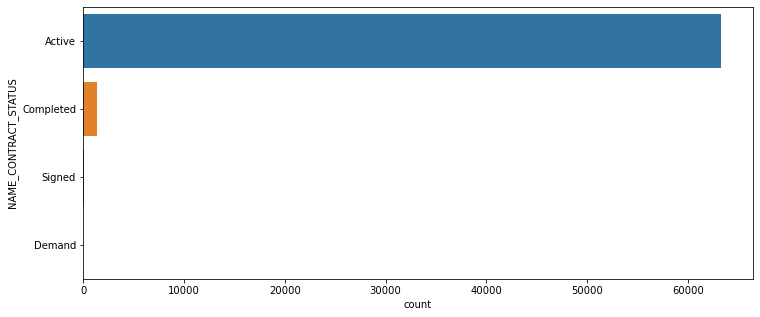

In [27]:
obj_col = creditcard.select_dtypes(['object']).columns.to_list()
print(obj_col)
for feature in obj_col:
    plt.figure(figsize=(12,5))
    sns.countplot(y = creditcard[feature])

<AxesSubplot:>

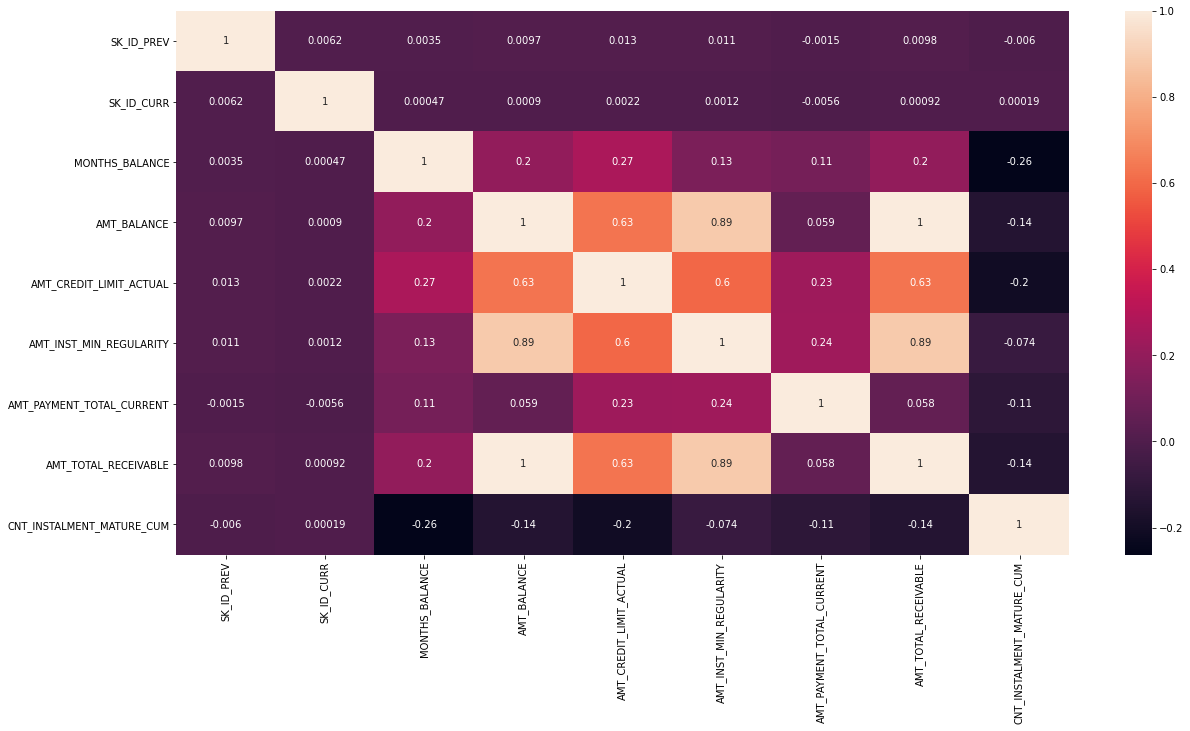

In [28]:
plt.figure(figsize=(20, 10))
sns.heatmap(creditcard.corr(), annot=True)

In [35]:
creditcard

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS
8,2363012,362014,-1,0.00,0,0.0,270.000,0.00,0.0,Active
24,1574073,297390,-1,38245.50,45000,0.0,0.000,36000.00,0.0,Active
106,1989770,451478,-2,0.00,0,0.0,0.000,0.00,0.0,Active
127,1363328,176839,-1,17941.14,90000,0.0,13500.000,15695.64,0.0,Active
168,1687718,114836,-1,173481.39,180000,0.0,2488.635,173481.39,0.0,Active
...,...,...,...,...,...,...,...,...,...,...
104297,2032117,355450,-11,0.00,45000,0.0,0.000,0.00,36.0,Active
104299,1301378,303373,-15,0.00,0,0.0,0.000,0.00,60.0,Active
104300,2621524,172581,-11,0.00,0,0.0,0.000,0.00,21.0,Active
104303,1714892,347207,-9,0.00,45000,0.0,0.000,0.00,23.0,Active


In [29]:
# Merge Credit Card Balance dan Instalments Payments
credinstal = creditcard.merge(installpay, how = "inner", on = "SK_ID_PREV")
credinstal

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,2363012,362014,-1,0.000,0,0.0,270.000,0.000,0.0,Active,0.0,1,-35.0,-35.0,270.000,270.000
1,1574073,297390,-1,38245.500,45000,0.0,0.000,36000.000,0.0,Active,0.0,1,-22.0,-22.0,6750.000,6750.000
2,1147049,415069,-2,0.000,45000,0.0,28174.725,0.000,0.0,Active,0.0,10,-2.0,-14.0,2250.000,1314.315
3,1009354,447972,-1,0.000,0,0.0,450000.000,0.000,0.0,Active,0.0,1,-45.0,-45.0,450000.000,450000.000
4,1416778,450323,-1,81918.675,450000,0.0,37564.785,81918.675,0.0,Active,0.0,3,-4.0,-4.0,2356.695,2356.695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63954,1301378,303373,-15,0.000,0,0.0,0.000,0.000,60.0,Active,0.0,53,-1211.0,-1221.0,9000.000,9000.000
63955,2621524,172581,-11,0.000,0,0.0,0.000,0.000,21.0,Active,0.0,101,-598.0,-598.0,4.860,4.860
63956,1714892,347207,-9,0.000,45000,0.0,0.000,0.000,23.0,Active,0.0,64,-806.0,-806.0,1879.110,1879.110
63957,1302323,215757,-9,275784.975,585000,2250.0,356994.675,273093.975,18.0,Active,0.0,31,-435.0,-454.0,2250.000,2250.000


In [30]:
credinstal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63959 entries, 0 to 63958
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_PREV                 63959 non-null  int64  
 1   SK_ID_CURR                 63959 non-null  int64  
 2   MONTHS_BALANCE             63959 non-null  int64  
 3   AMT_BALANCE                63959 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL    63959 non-null  int64  
 5   AMT_INST_MIN_REGULARITY    63959 non-null  float64
 6   AMT_PAYMENT_TOTAL_CURRENT  63959 non-null  float64
 7   AMT_TOTAL_RECEIVABLE       63959 non-null  float64
 8   CNT_INSTALMENT_MATURE_CUM  63959 non-null  float64
 9   NAME_CONTRACT_STATUS       63959 non-null  object 
 10  NUM_INSTALMENT_VERSION     63959 non-null  float64
 11  NUM_INSTALMENT_NUMBER      63959 non-null  int64  
 12  DAYS_INSTALMENT            63959 non-null  float64
 13  DAYS_ENTRY_PAYMENT         63959 non-null  flo

In [31]:
credinstal.drop(['SK_ID_PREV'],axis=1, inplace=True)

In [32]:
credinstal

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_TOTAL_CURRENT,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,362014,-1,0.000,0,0.0,270.000,0.000,0.0,Active,0.0,1,-35.0,-35.0,270.000,270.000
1,297390,-1,38245.500,45000,0.0,0.000,36000.000,0.0,Active,0.0,1,-22.0,-22.0,6750.000,6750.000
2,415069,-2,0.000,45000,0.0,28174.725,0.000,0.0,Active,0.0,10,-2.0,-14.0,2250.000,1314.315
3,447972,-1,0.000,0,0.0,450000.000,0.000,0.0,Active,0.0,1,-45.0,-45.0,450000.000,450000.000
4,450323,-1,81918.675,450000,0.0,37564.785,81918.675,0.0,Active,0.0,3,-4.0,-4.0,2356.695,2356.695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63954,303373,-15,0.000,0,0.0,0.000,0.000,60.0,Active,0.0,53,-1211.0,-1221.0,9000.000,9000.000
63955,172581,-11,0.000,0,0.0,0.000,0.000,21.0,Active,0.0,101,-598.0,-598.0,4.860,4.860
63956,347207,-9,0.000,45000,0.0,0.000,0.000,23.0,Active,0.0,64,-806.0,-806.0,1879.110,1879.110
63957,215757,-9,275784.975,585000,2250.0,356994.675,273093.975,18.0,Active,0.0,31,-435.0,-454.0,2250.000,2250.000


In [33]:
info = pd.DataFrame(credinstal.dtypes, columns=['Dtypes'])
info['Unique'] = credinstal.nunique().values
info['NA'] = credinstal.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,63729,0
MONTHS_BALANCE,int64,96,0
AMT_BALANCE,float64,39750,0
AMT_CREDIT_LIMIT_ACTUAL,int64,109,0
AMT_INST_MIN_REGULARITY,float64,22957,0
AMT_PAYMENT_TOTAL_CURRENT,float64,17372,0
AMT_TOTAL_RECEIVABLE,float64,40282,0
CNT_INSTALMENT_MATURE_CUM,float64,105,0
NAME_CONTRACT_STATUS,object,3,0
NUM_INSTALMENT_VERSION,float64,1,0


In [34]:
credinstal.to_csv("CredInstal.csv", index=False)

In [35]:
credinstal.isna().sum()

SK_ID_CURR                   0
MONTHS_BALANCE               0
AMT_BALANCE                  0
AMT_CREDIT_LIMIT_ACTUAL      0
AMT_INST_MIN_REGULARITY      0
AMT_PAYMENT_TOTAL_CURRENT    0
AMT_TOTAL_RECEIVABLE         0
CNT_INSTALMENT_MATURE_CUM    0
NAME_CONTRACT_STATUS         0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT           0
AMT_INSTALMENT               0
AMT_PAYMENT                  0
dtype: int64

# Pos Cash Balance

In [36]:
poscash = pd.read_csv('POS_CASH_balance.csv')

In [37]:
poscash = poscash.drop_duplicates(subset = ['SK_ID_PREV'], keep = 'last').reset_index(drop = True)

In [38]:
poscash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2373788,146563,-1,12.0,12.0,Active,0,0
1,1627415,370458,-1,6.0,6.0,Active,0,0
2,2011906,161589,-1,12.0,12.0,Active,0,0
3,1618886,382448,-2,NaN,NaN,Signed,0,0
4,1568532,369401,-1,24.0,24.0,Active,0,0
...,...,...,...,...,...,...,...,...
936320,2448283,226558,-20,6.0,0.0,Active,843,0
936321,1717234,141565,-19,12.0,0.0,Active,602,0
936322,1283126,315695,-21,10.0,0.0,Active,609,0
936323,1082516,450255,-22,12.0,0.0,Active,614,0


In [39]:
# Below code gives percentage of null in every column
na_percentage = (poscash.isna().sum()/poscash.shape[0])*100

# Below code gives list of columns having more than 60% null
col_to_drop = na_percentage[na_percentage>50].keys()
print(col_to_drop)

creditcard = creditcard.drop(col_to_drop, axis=1)

Index([], dtype='object')


In [40]:
poscash.isna().sum()

SK_ID_PREV                  0
SK_ID_CURR                  0
MONTHS_BALANCE              0
CNT_INSTALMENT           5560
CNT_INSTALMENT_FUTURE    5561
NAME_CONTRACT_STATUS        0
SK_DPD                      0
SK_DPD_DEF                  0
dtype: int64

In [42]:
poscash.dropna(how='any', inplace=True)

In [43]:
poscash.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,930755.0,1.903084e+06,535604.044805,1000001.0,1434873.5,1896083.0,2368519.5,2843499.0
SK_ID_CURR,930755.0,2.782732e+05,102799.016560,100001.0,189278.0,278473.0,367332.0,456255.0
MONTHS_BALANCE,930755.0,-3.496220e+01,27.712082,-96.0,-56.0,-27.0,-11.0,-1.0
CNT_INSTALMENT,930755.0,1.408167e+01,11.005334,1.0,6.0,12.0,18.0,84.0
CNT_INSTALMENT_FUTURE,930755.0,9.075878e+00,10.838095,0.0,2.0,6.0,11.0,84.0
SK_DPD,930755.0,2.336183e+00,53.766241,0.0,0.0,0.0,0.0,3897.0
SK_DPD_DEF,930755.0,1.325633e-01,11.562852,0.0,0.0,0.0,0.0,3110.0


In [44]:
print(poscash[['SK_DPD', 'SK_DPD_DEF']].value_counts(normalize=True)) #parameter normalize=true
#too many 0 -> drop
poscash.drop(columns = ['SK_DPD', 'SK_DPD_DEF'], inplace=True)

SK_DPD  SK_DPD_DEF
0       0             0.983202
1       1             0.001553
2       2             0.001099
3       3             0.000873
4       4             0.000736
                        ...   
1002    0             0.000001
1009    0             0.000001
1010    0             0.000001
1012    0             0.000001
657     657           0.000001
Length: 1483, dtype: float64


['NAME_CONTRACT_STATUS']


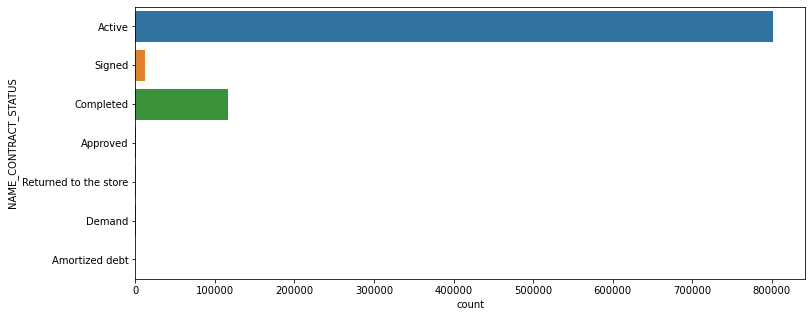

In [45]:
obj_col = poscash.select_dtypes(['object']).columns.to_list()
print(obj_col)
for feature in obj_col:
    plt.figure(figsize=(12,5))
    sns.countplot(y = poscash[feature])

In [46]:
poscash.drop('SK_ID_CURR', axis = 1, inplace=True)

In [47]:
poscash.isna().sum()

SK_ID_PREV               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
dtype: int64

# Previous app

In [83]:
prev = pd.read_csv('previous_application.csv')

In [84]:
prev.shape

(1670214, 37)

In [85]:
prev = prev.drop_duplicates(subset = ['SK_ID_PREV'], keep = 'last').reset_index(drop = True)

In [86]:
info = pd.DataFrame(prev.dtypes, columns=['Dtypes'])
info['Unique'] = prev.nunique().values
info['NA'] = prev.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_PREV,int64,1670214,0
SK_ID_CURR,int64,338857,0
NAME_CONTRACT_TYPE,object,4,0
AMT_ANNUITY,float64,357959,372235
AMT_APPLICATION,float64,93885,0
AMT_CREDIT,float64,86803,1
AMT_DOWN_PAYMENT,float64,29278,895844
AMT_GOODS_PRICE,float64,93885,385515
WEEKDAY_APPR_PROCESS_START,object,7,0
HOUR_APPR_PROCESS_START,int64,24,0


In [87]:
# Below code gives percentage of null in every column
na_percentage = (prev.isna().sum()/prev.shape[0])*100

# Below code gives list of columns having more than 60% null
col_to_drop = na_percentage[na_percentage>60].keys()
print(col_to_drop)

prev = prev.drop(col_to_drop, axis=1)

Index(['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], dtype='object')


In [88]:
prev.dropna(how='any', inplace=True)

In [89]:
prev.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,430536.0,1.900479e+06,535600.923445,1000002.00,1431935.750,1.891527e+06,2.363313e+06,2843489.000
SK_ID_CURR,430536.0,2.783948e+05,102870.083493,100001.00,189400.750,2.783770e+05,3.676322e+05,456255.000
AMT_ANNUITY,430536.0,1.036522e+04,7969.946709,635.04,5197.995,8.322255e+03,1.307542e+04,393868.665
AMT_APPLICATION,430536.0,9.455608e+04,84613.111171,5400.00,39555.000,7.236000e+04,1.215000e+05,3510000.000
AMT_CREDIT,430536.0,9.361808e+04,84097.730287,5139.00,37710.000,7.080750e+04,1.217340e+05,2176551.000
AMT_DOWN_PAYMENT,430536.0,7.105576e+03,15577.842055,0.00,0.000,2.610000e+03,9.000000e+03,3060045.000
AMT_GOODS_PRICE,430536.0,9.455608e+04,84613.111171,5400.00,39555.000,7.236000e+04,1.215000e+05,3510000.000
HOUR_APPR_PROCESS_START,430536.0,1.286488e+01,3.302271,0.00,11.000,1.300000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,430536.0,1.000000e+00,0.000000,1.00,1.000,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,430536.0,8.750021e-02,0.111807,0.00,0.000,9.608801e-02,1.089091e-01,1.000


['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


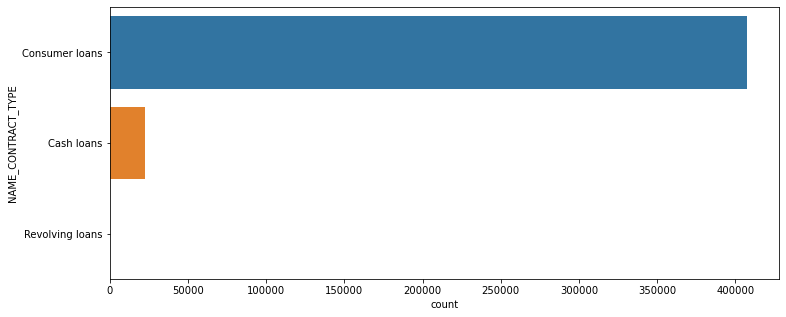

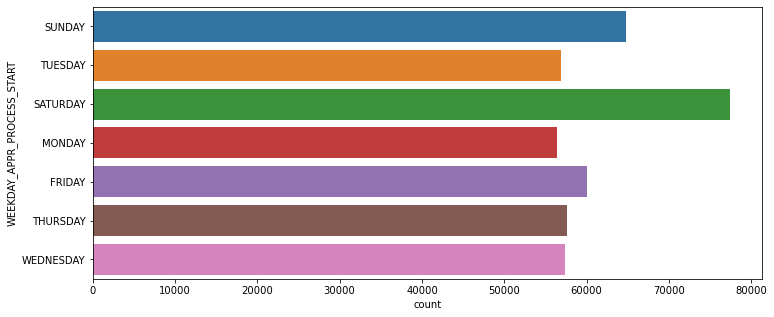

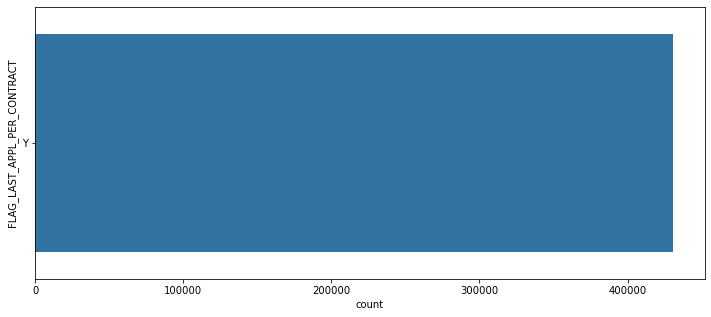

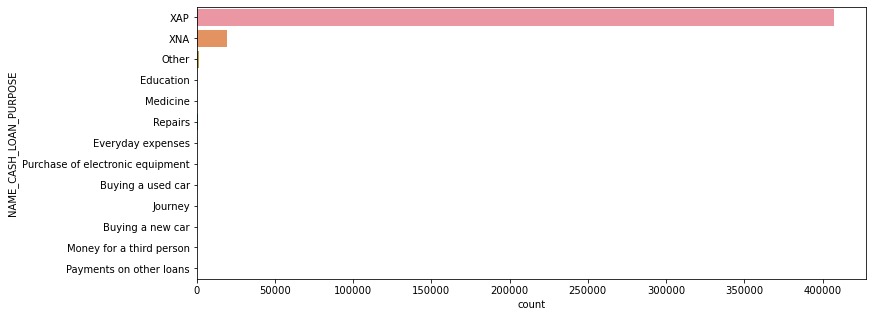

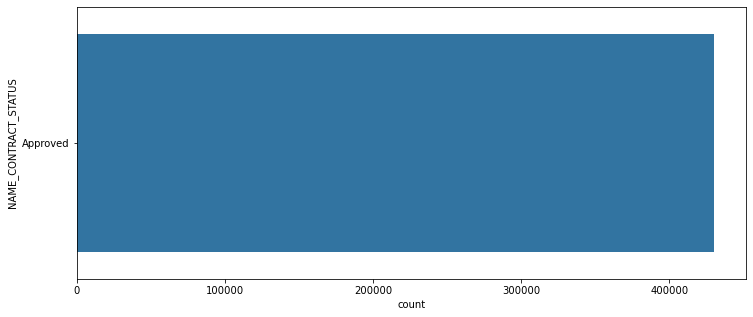

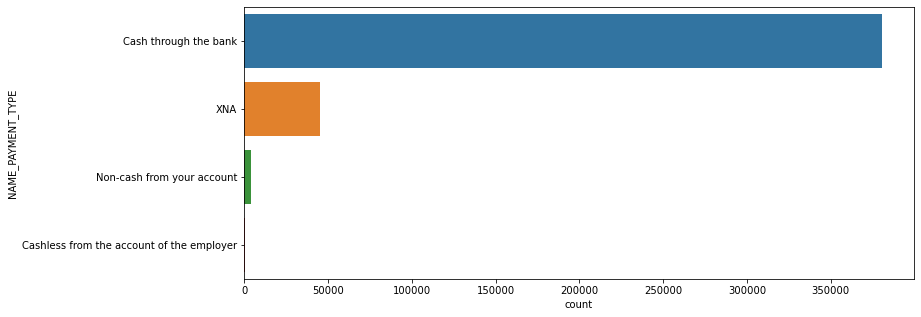

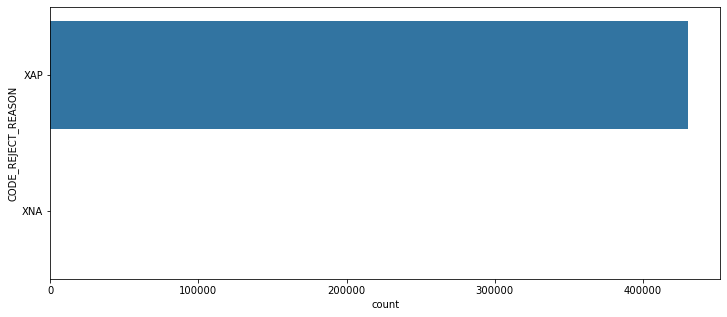

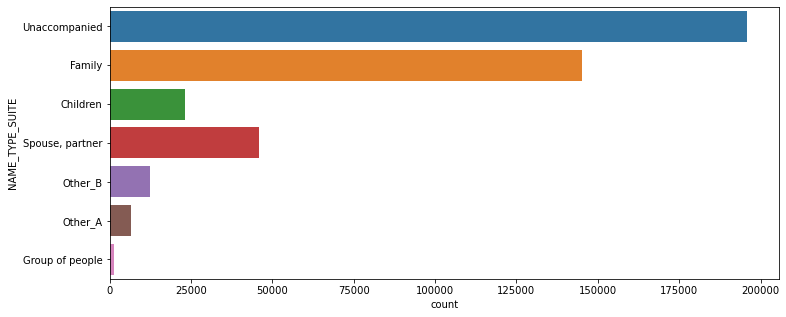

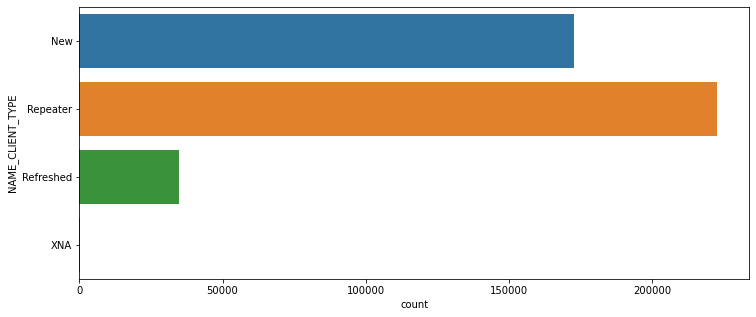

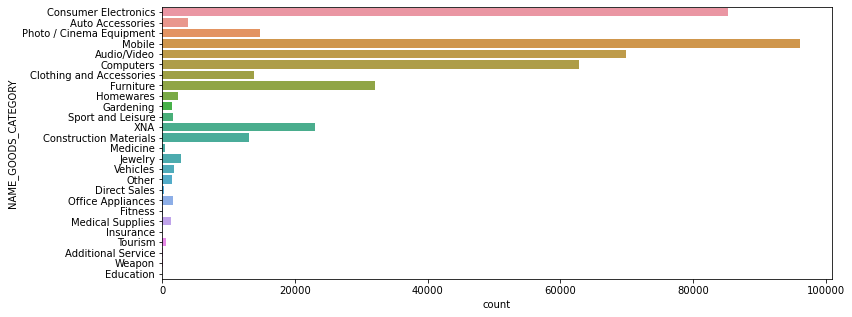

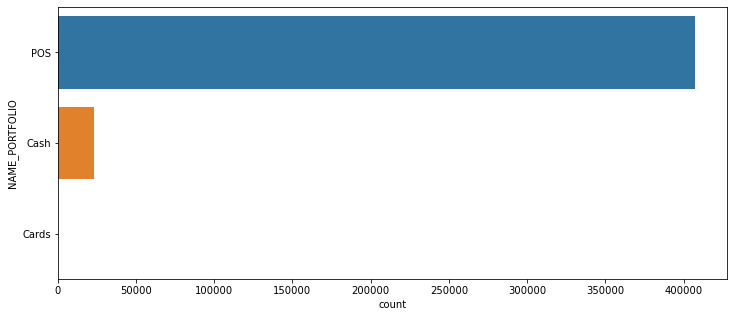

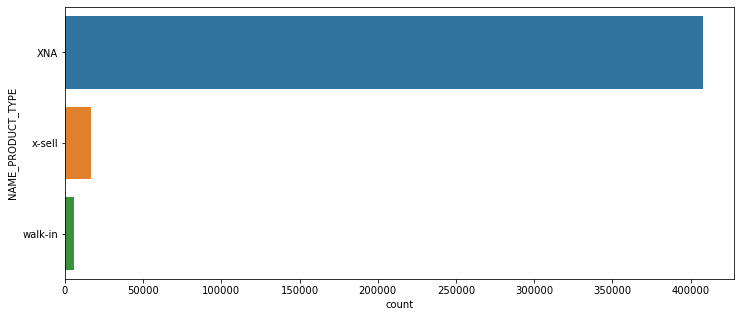

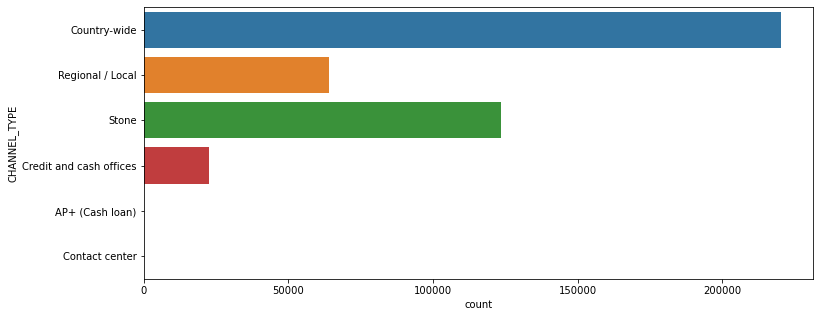

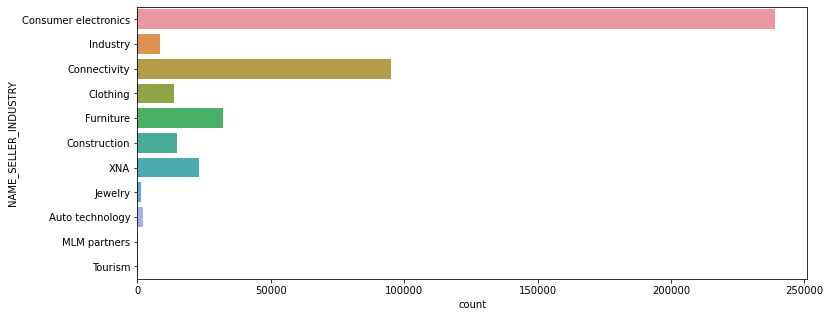

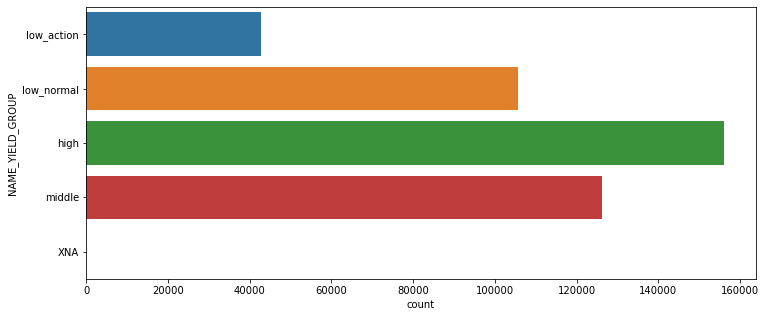

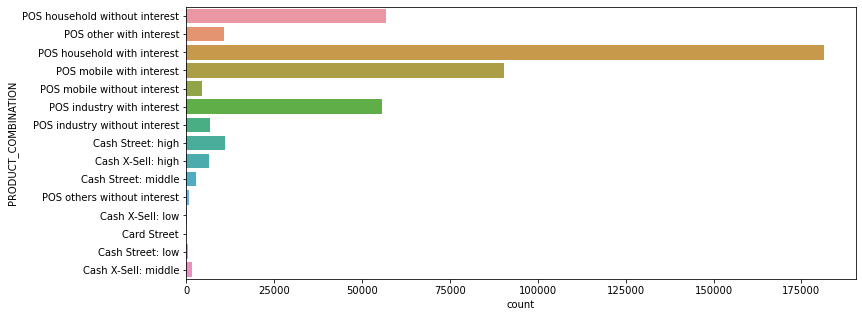

In [90]:
obj_col = prev.select_dtypes(['object']).columns.to_list()
print(obj_col)
for feature in obj_col:
    plt.figure(figsize=(12,5))
    sns.countplot(y = prev[feature])

In [91]:
#drop NAME_CASH_LOAN_PURPOSE bcs it has too many XAP, XNA value
#drop CODE_REJECT_REASON since it's not explained well
#drop FLAG_LAST_APPL_PER_CONTRACT since it's almost Y #xem lại
prev.drop(columns=['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'FLAG_LAST_APPL_PER_CONTRACT'], inplace=True)

In [92]:
prev = prev[prev != 'XNA']

In [94]:
prev.dropna(axis=1, how='any',inplace=True)

In [95]:
info = pd.DataFrame(prev.dtypes, columns=['Dtypes'])
info['Unique'] = prev.nunique().values
info['NA'] = prev.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_PREV,int64,430536,0
SK_ID_CURR,int64,243904,0
NAME_CONTRACT_TYPE,object,3,0
AMT_ANNUITY,float64,234893,0
AMT_APPLICATION,float64,67655,0
AMT_CREDIT,float64,58052,0
AMT_DOWN_PAYMENT,float64,20336,0
AMT_GOODS_PRICE,float64,67655,0
WEEKDAY_APPR_PROCESS_START,object,7,0
HOUR_APPR_PROCESS_START,int64,24,0


In [96]:
prev.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,430536.0,1.900479e+06,535600.923445,1000002.00,1431935.750,1.891527e+06,2.363313e+06,2843489.000
SK_ID_CURR,430536.0,2.783948e+05,102870.083493,100001.00,189400.750,2.783770e+05,3.676322e+05,456255.000
AMT_ANNUITY,430536.0,1.036522e+04,7969.946709,635.04,5197.995,8.322255e+03,1.307542e+04,393868.665
AMT_APPLICATION,430536.0,9.455608e+04,84613.111171,5400.00,39555.000,7.236000e+04,1.215000e+05,3510000.000
AMT_CREDIT,430536.0,9.361808e+04,84097.730287,5139.00,37710.000,7.080750e+04,1.217340e+05,2176551.000
AMT_DOWN_PAYMENT,430536.0,7.105576e+03,15577.842055,0.00,0.000,2.610000e+03,9.000000e+03,3060045.000
AMT_GOODS_PRICE,430536.0,9.455608e+04,84613.111171,5400.00,39555.000,7.236000e+04,1.215000e+05,3510000.000
HOUR_APPR_PROCESS_START,430536.0,1.286488e+01,3.302271,0.00,11.000,1.300000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,430536.0,1.000000e+00,0.000000,1.00,1.000,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,430536.0,8.750021e-02,0.111807,0.00,0.000,9.608801e-02,1.089091e-01,1.000


In [97]:
# drop DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE bcs both of them doesnt affect other features except the feature contains since 1000 years too
# 1000 years are unreasonable for poeple so thats why the features will be dropped
prev.drop(columns= ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION'], inplace=True)

<AxesSubplot:>

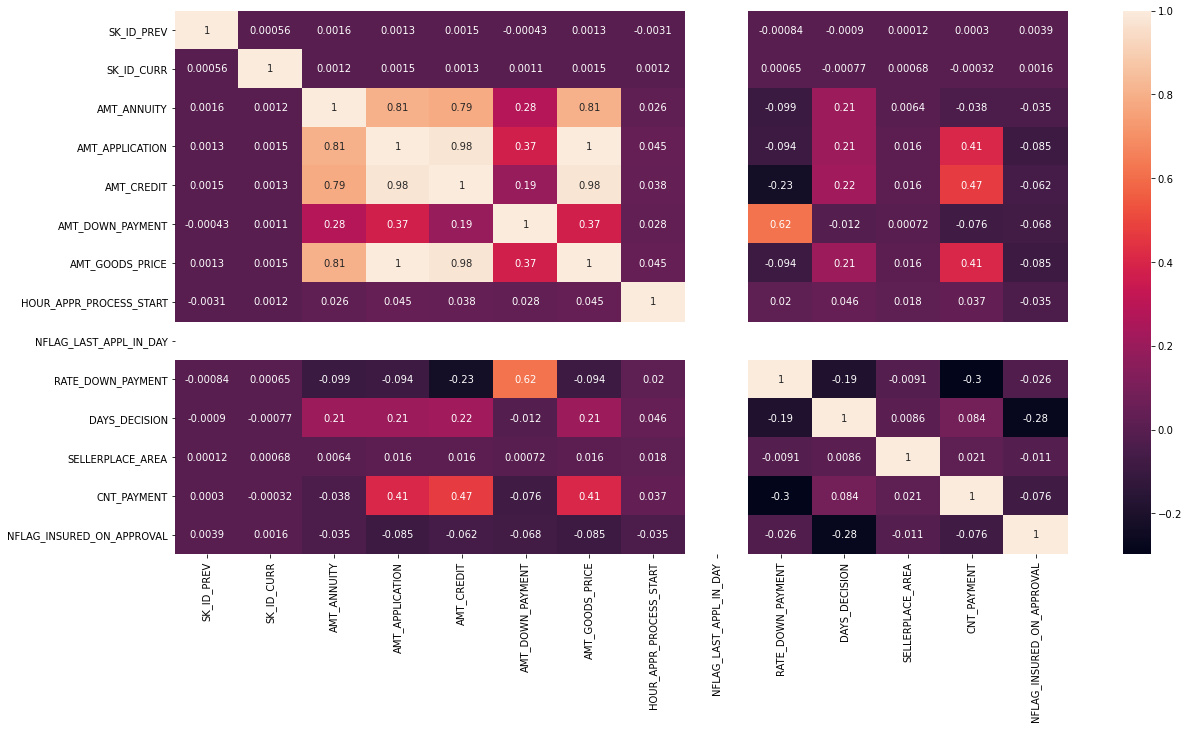

In [98]:
plt.figure(figsize=(20, 10))
sns.heatmap(prev.corr(), annot=True)

In [99]:
# Drop NFLAG_LAST_APPL_IN_DAY bcs not affect to any variables
prev.drop(columns=['NFLAG_LAST_APPL_IN_DAY','HOUR_APPR_PROCESS_START','SELLERPLACE_AREA'], inplace=True)

In [100]:
#high cor: AMT_APPLICATION, AMT_CREDIT -> drop AMT_APPLICATION bcs it's only the amount that client asks for, not the final one
#AMT_CREDIT VS AMT_GOODS_PRICE -> drop AMT_GOODS_PRICE with the same reason above 
#AMT_APPLICATION VS AMT_ANNUITY -> drop AMT_ANNUITY
prev.drop(columns= ['AMT_APPLICATION', 'AMT_GOODS_PRICE'], inplace=True)

In [101]:
prev.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,430536.0,1.900479e+06,535600.923445,1000002.00,1431935.750,1.891527e+06,2.363313e+06,2843489.000
SK_ID_CURR,430536.0,2.783948e+05,102870.083493,100001.00,189400.750,2.783770e+05,3.676322e+05,456255.000
AMT_ANNUITY,430536.0,1.036522e+04,7969.946709,635.04,5197.995,8.322255e+03,1.307542e+04,393868.665
AMT_CREDIT,430536.0,9.361808e+04,84097.730287,5139.00,37710.000,7.080750e+04,1.217340e+05,2176551.000
AMT_DOWN_PAYMENT,430536.0,7.105576e+03,15577.842055,0.00,0.000,2.610000e+03,9.000000e+03,3060045.000
RATE_DOWN_PAYMENT,430536.0,8.750021e-02,0.111807,0.00,0.000,9.608801e-02,1.089091e-01,1.000
DAYS_DECISION,430536.0,-1.456961e+03,814.156790,-2922.00,-2173.000,-1.458000e+03,-8.290000e+02,-1.000
CNT_PAYMENT,430536.0,1.133902e+01,5.706496,0.00,6.000,1.000000e+01,1.200000e+01,60.000
NFLAG_INSURED_ON_APPROVAL,430536.0,2.644959e-01,0.441065,0.00,0.000,0.000000e+00,1.000000e+00,1.000


In [102]:
info = pd.DataFrame(prev.dtypes, columns=['Dtypes'])
info['Unique'] = prev.nunique().values
info['NA'] = prev.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_PREV,int64,430536,0
SK_ID_CURR,int64,243904,0
NAME_CONTRACT_TYPE,object,3,0
AMT_ANNUITY,float64,234893,0
AMT_CREDIT,float64,58052,0
AMT_DOWN_PAYMENT,float64,20336,0
WEEKDAY_APPR_PROCESS_START,object,7,0
RATE_DOWN_PAYMENT,float64,145415,0
NAME_CONTRACT_STATUS,object,1,0
DAYS_DECISION,int64,2922,0


In [103]:
prev_poscash = prev.merge(poscash, how='inner', on = 'SK_ID_PREV') 

In [104]:
prev_poscash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426346 entries, 0 to 426345
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_PREV                  426346 non-null  int64  
 1   SK_ID_CURR                  426346 non-null  int64  
 2   NAME_CONTRACT_TYPE          426346 non-null  object 
 3   AMT_ANNUITY                 426346 non-null  float64
 4   AMT_CREDIT                  426346 non-null  float64
 5   AMT_DOWN_PAYMENT            426346 non-null  float64
 6   WEEKDAY_APPR_PROCESS_START  426346 non-null  object 
 7   RATE_DOWN_PAYMENT           426346 non-null  float64
 8   NAME_CONTRACT_STATUS_x      426346 non-null  object 
 9   DAYS_DECISION               426346 non-null  int64  
 10  NAME_TYPE_SUITE             426346 non-null  object 
 11  NAME_PORTFOLIO              426346 non-null  object 
 12  CHANNEL_TYPE                426346 non-null  object 
 13  CNT_PAYMENT   

In [105]:
prev_poscash['NAME_CONTRACT_STATUS'] = prev_poscash[['NAME_CONTRACT_STATUS_x','NAME_CONTRACT_STATUS_y']].sum(axis=1)
prev_poscash.drop(['NAME_CONTRACT_STATUS_x','NAME_CONTRACT_STATUS_y'],axis=1, inplace=True)

In [106]:
prev_poscash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426346 entries, 0 to 426345
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_PREV                  426346 non-null  int64  
 1   SK_ID_CURR                  426346 non-null  int64  
 2   NAME_CONTRACT_TYPE          426346 non-null  object 
 3   AMT_ANNUITY                 426346 non-null  float64
 4   AMT_CREDIT                  426346 non-null  float64
 5   AMT_DOWN_PAYMENT            426346 non-null  float64
 6   WEEKDAY_APPR_PROCESS_START  426346 non-null  object 
 7   RATE_DOWN_PAYMENT           426346 non-null  float64
 8   DAYS_DECISION               426346 non-null  int64  
 9   NAME_TYPE_SUITE             426346 non-null  object 
 10  NAME_PORTFOLIO              426346 non-null  object 
 11  CHANNEL_TYPE                426346 non-null  object 
 12  CNT_PAYMENT                 426346 non-null  float64
 13  PRODUCT_COMBIN

In [107]:
prev_poscash = prev_poscash.drop_duplicates(subset = ['SK_ID_PREV'], keep = 'last').reset_index(drop = True)

In [108]:
prev_poscash.drop(['SK_ID_PREV'],axis=1, inplace=True)

In [109]:
prev_poscash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426346 entries, 0 to 426345
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  426346 non-null  int64  
 1   NAME_CONTRACT_TYPE          426346 non-null  object 
 2   AMT_ANNUITY                 426346 non-null  float64
 3   AMT_CREDIT                  426346 non-null  float64
 4   AMT_DOWN_PAYMENT            426346 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START  426346 non-null  object 
 6   RATE_DOWN_PAYMENT           426346 non-null  float64
 7   DAYS_DECISION               426346 non-null  int64  
 8   NAME_TYPE_SUITE             426346 non-null  object 
 9   NAME_PORTFOLIO              426346 non-null  object 
 10  CHANNEL_TYPE                426346 non-null  object 
 11  CNT_PAYMENT                 426346 non-null  float64
 12  PRODUCT_COMBINATION         426346 non-null  object 
 13  NFLAG_INSURED_

In [110]:
prev_poscash.to_csv("prev_poscash.csv", index=False)